In [1]:
import pandas as pd

In [2]:
def load_csv(csv_path):
    data_df = pd.read_csv(csv_path)
    return data_df

In [17]:
df = load_csv("../data/raw/listings_images.csv")
df

,listingImageId,listingId,suburbName,state,suburbId,imageLink
0,158649238,15385009,GRIFFITH,ACT,1996,pics/009/15385009-1-F04DAED.jpg
1,158649239,15385009,GRIFFITH,ACT,1996,pics/009/15385009-2-981E301.jpg
2,158649240,15385009,GRIFFITH,ACT,1996,pics/009/15385009-3-37ED883.jpg
3,158649241,15385009,GRIFFITH,ACT,1996,pics/009/15385009-4-DB8E63C.jpg
4,158649242,15385009,GRIFFITH,ACT,1996,pics/009/15385009-5-B8CDE9A.jpg
...,...,...,...,...,...,...
16484,158499471,15375609,SANCTUARY COVE,QLD,17223,pics/609/15375609-14-A843F8F.jpg
16485,158499472,15375609,SANCTUARY COVE,QLD,17223,pics/609/15375609-15-0D7F791.png
16486,158499473,15375609,SANCTUARY COVE,QLD,17223,pics/609/15375609-16-9303D50.png
16487,158499474,15375609,SANCTUARY COVE,QLD,17223,pics/609/15375609-17-880316C.png


In [5]:
def create_link(link):
    base_link = "https://resi.stgz.view.com.au/viewstatic/images/listing/acw/800-w/"
    edited_link = link.split("/")
    return base_link + edited_link[2]

In [6]:
def load_raw_data(df):
    data_dict = []

    for index, row in df.iterrows():
        row_dict = row.to_dict()

        edited_link = create_link(row_dict["imageLink"])
        row_dict["imageLink"] = edited_link
        data_dict.append(row_dict)

    return data_dict


In [7]:
data_dict = load_raw_data(df)

In [8]:
data_dict[:10]

[{'listingImageId': 158649238,
  'listingId': 15385009,
  'suburbName': 'GRIFFITH',
  'state': 'ACT',
  'suburbId': 1996,
  'imageLink': 'https://resi.stgz.view.com.au/viewstatic/images/listing/acw/800-w/15385009-1-F04DAED.jpg'},
 {'listingImageId': 158649239,
  'listingId': 15385009,
  'suburbName': 'GRIFFITH',
  'state': 'ACT',
  'suburbId': 1996,
  'imageLink': 'https://resi.stgz.view.com.au/viewstatic/images/listing/acw/800-w/15385009-2-981E301.jpg'},
 {'listingImageId': 158649240,
  'listingId': 15385009,
  'suburbName': 'GRIFFITH',
  'state': 'ACT',
  'suburbId': 1996,
  'imageLink': 'https://resi.stgz.view.com.au/viewstatic/images/listing/acw/800-w/15385009-3-37ED883.jpg'},
 {'listingImageId': 158649241,
  'listingId': 15385009,
  'suburbName': 'GRIFFITH',
  'state': 'ACT',
  'suburbId': 1996,
  'imageLink': 'https://resi.stgz.view.com.au/viewstatic/images/listing/acw/800-w/15385009-4-DB8E63C.jpg'},
 {'listingImageId': 158649242,
  'listingId': 15385009,
  'suburbName': 'GRIFFIT

In [39]:
import requests as req
import io
from PIL import Image
import numpy as np
import torch

In [40]:
def download_image(image_link):

    try:
        image_content = req.get(image_link, timeout = 10).content
        image_file = io.BytesIO(image_content)
        pil_image = Image.open(image_file)
        # img_arr = np.array(pil_image)
        # print(img_arr)
    except Exception as e:
        print("An error occurred while downloading the image!", e)


    if len(pil_image.getbands()) <= 3:
        try:
            file_path = "Hello.png"
            with open(file_path, "wb") as f:
                pil_image.save(f)
            print("Downloaded: ", file_path)
        except Exception as e:
            print(f"Error while saving the image")
    else:
        print("An image with alpha channel found, hence discarding it!")

    return pil_image


In [44]:
pil_image = download_image('https://resi.stgz.view.com.au/viewstatic/images/listing/acw/800-w/15385009-10-F7E28CF.jpg')
pil_image1 = download_image('https://resi.stgz.view.com.au/viewstatic/images/listing/acw/800-w/15385009-4-DB8E63C.jpg')

Downloaded:  Hello.png
Downloaded:  Hello.png


In [42]:
model = torch.hub.load('../models/yolov5','custom', path="../models/yolov5/runs/train/exp/weights/best.pt", source="local")

YOLOv5 🚀 v7.0-287-g574331f9 Python-3.10.12 torch-2.2.1+cpu CPU



Fusing layers... 
Model summary: 157 layers, 7053277 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [45]:
results = model([pil_image, pil_image1])
print(results)
    # listing_image_id = row["listingImageId"]
    # listing_id = row["listingId"]
    # suburb_name = row["suburbName"]
    # state = row["state"]
    # suburb_id = row["suburbId"]
    # file_name = row["fileName"]

image 1/2: 534x800 1 courtyard
image 2/2: 534x800 1 kitchen_island, 1 kitchen, 1 microwave_oven
Speed: 4.4ms pre-process, 108.6ms inference, 0.4ms NMS per image at shape (2, 3, 448, 640)


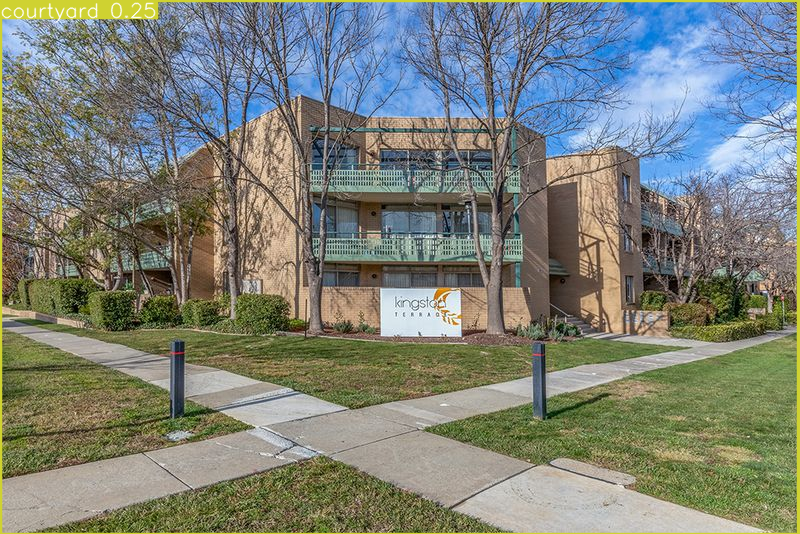

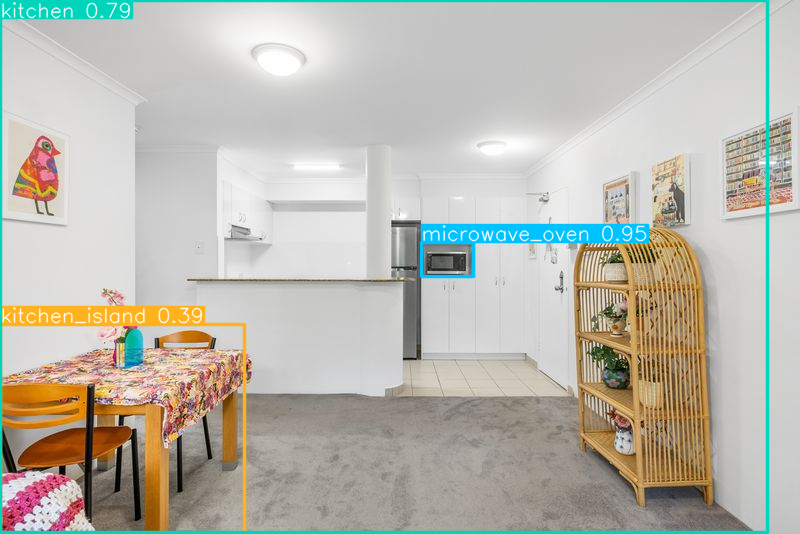

In [47]:
results.show()